All of the data used herein was retrieved from basketball-reference.com, except for the height and weight data, which was retrieved from [here](http://simonwarchol.github.io/NBA-Height-Weight/).

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression

In [43]:
players = pd.read_csv('data_files//players_2014.csv')
players[['Player','temp']] = players['Player'].str.split('\\',expand=True)
players = players.drop(['Rk','temp'],axis=1)
players_grouped = players.groupby('Player').count()
players_grouped = players_grouped[players_grouped['Tm'] > 1]
players = players[~((players['Player'].isin(players_grouped.index)==True) & (players['Tm'] != 'TOT'))]

players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Quincy Acy,PF,24,NYK,68,22,18.9,2.2,4.9,0.459,0.3,0.9,0.300,2.0,4.0,0.494,0.486,1.1,1.4,0.784,1.2,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9
1,Jordan Adams,SG,20,MEM,30,0,8.3,1.2,2.9,0.407,0.3,0.8,0.400,0.8,2.0,0.410,0.465,0.5,0.8,0.609,0.3,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1
2,Steven Adams,C,21,OKC,70,67,25.3,3.1,5.7,0.544,0.0,0.0,0.000,3.1,5.7,0.547,0.544,1.5,2.9,0.502,2.8,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7
3,Jeff Adrien,PF,28,MIN,17,0,12.6,1.1,2.6,0.432,0.0,0.0,NaN,1.1,2.6,0.432,0.432,1.3,2.2,0.579,1.4,3.2,4.5,0.9,0.2,0.5,0.5,1.8,3.5
4,Arron Afflalo,SG,29,TOT,78,72,32.1,4.8,11.3,0.424,1.5,4.3,0.354,3.3,7.1,0.466,0.491,2.1,2.5,0.843,0.3,2.8,3.2,1.7,0.5,0.1,1.5,2.1,13.3


In [44]:
hw = pd.read_excel('data_files//heightweight.xlsx',sheet_name='2014')
new_names = ['Player','Height','x','Weight']
hw.columns = new_names
hw = hw.drop('x',axis=1)

players_merged = players.merge(right=hw,
                               left_on=['Player'],
                               right_on=['Player'],
                               how='inner')

players_merged = players_merged.set_index('Player')

([<matplotlib.axis.XTick at 0x1d6f6f93bc8>,
 <a list of 18 Text xticklabel objects>)

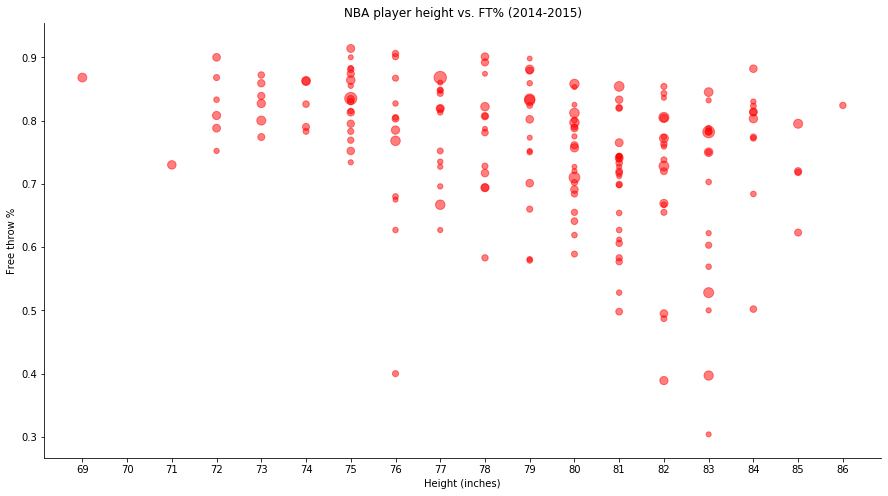

In [45]:
ft = players_merged[players_merged['FTA'] > 1.5]

fig, ax = plt.subplots(figsize=[15,8])

# Size of bubble indicates number of free throws attempted per game
ax.scatter(ft['Height'], ft['FT%'], s=ft['FTA']*15, c='red', alpha=0.5)
ax.set_title('NBA player height vs. FT% (2014-2015)')
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Free throw %')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(69.0,87.0, step=1.0))

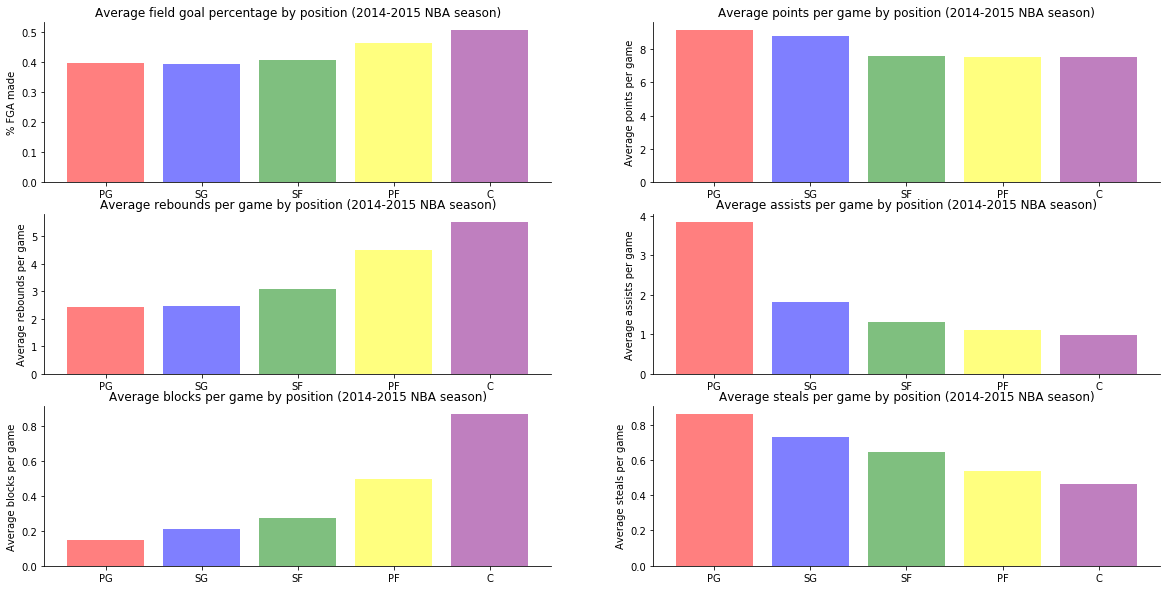

In [47]:
players_pos = players.groupby('Pos').mean()
to_keep = ['PG', 'SG', 'SF', 'PF', 'C']
players_pos = players_pos[players_pos.index.isin(to_keep)]
players_pos = players_pos.reindex(index = ['PG', 'SG', 'SF', 'PF', 'C'])

colors = ['red','blue','green','yellow','purple']

fig, ax = plt.subplots(3,2, figsize=[20,10])

ax[0,0].bar(players_pos.index, players_pos['FG%'], color=colors, alpha=0.5)
ax[0,0].set_title('Average field goal percentage by position (2014-2015 NBA season)')
ax[0,0].set_ylabel('% FGA made')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)

ax[0,1].bar(players_pos.index, players_pos['PTS'], color=colors, alpha=0.5)
ax[0,1].set_title('Average points per game by position (2014-2015 NBA season)')
ax[0,1].set_ylabel('Average points per game')
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)

ax[1,0].bar(players_pos.index, players_pos['TRB'], color=colors, alpha=0.5)
ax[1,0].set_title('Average rebounds per game by position (2014-2015 NBA season)')
ax[1,0].set_ylabel('Average rebounds per game')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

ax[1,1].bar(players_pos.index, players_pos['AST'], color=colors, alpha=0.5)
ax[1,1].set_title('Average assists per game by position (2014-2015 NBA season)')
ax[1,1].set_ylabel('Average assists per game')
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)

ax[2,0].bar(players_pos.index, players_pos['BLK'], color=colors, alpha=0.5)
ax[2,0].set_title('Average blocks per game by position (2014-2015 NBA season)')
ax[2,0].set_ylabel('Average blocks per game')
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)

ax[2,1].bar(players_pos.index, players_pos['STL'], color=colors, alpha=0.5)
ax[2,1].set_title('Average steals per game by position (2014-2015 NBA season)')
ax[2,1].set_ylabel('Average steals per game')
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)

I'm interested in seeing how these trends have changed over time. Basketball has gotten smaller over the last few decades with a greater emphasis on shooting than inside scoring. It would make sense to me that if we go a few decades back, you would expect point guards and shooting guards to have a less significant share of scoring than they do in the 2014-2015 data.

In [48]:
players_1994 = pd.read_csv('data_files//players_1994.csv')
players_1994[['Player','temp']] = players_1994['Player'].str.split('\\', expand=True)
players_1994 = players_1994.drop(['temp','Rk'], axis=1)
players_1994_grouped = players_1994.groupby('Player').count()
players_1994_grouped = players_1994_grouped[players_1994_grouped['Tm'] > 1]
players_1994 = players_1994[~((players_1994['Player'].isin(players_1994_grouped.index)==True) & (players_1994['Tm'] != 'TOT'))]

players_1994.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,0.511,0.0,0.0,0.000,2.2,4.2,0.515,0.511,0.4,0.6,0.571,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7
3,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,13.8,0.470,1.1,2.9,0.386,5.3,10.8,0.492,0.511,1.9,2.1,0.885,0.4,1.4,1.9,3.6,1.1,0.1,1.6,1.7,16.0
4,Michael Adams,PG,32,CHH,29,0,15.3,2.3,5.1,0.453,1.0,2.8,0.358,1.3,2.3,0.567,0.551,0.9,1.0,0.833,0.2,0.8,1.0,3.3,0.8,0.0,0.9,1.4,6.5
5,Rafael Addison,SF,30,DET,79,16,22.5,3.5,7.4,0.476,0.3,1.1,0.289,3.2,6.4,0.507,0.497,0.9,1.3,0.747,0.8,2.2,3.1,1.4,0.7,0.3,1.0,3.0,8.3
6,Danny Ainge,SG,35,PHO,74,1,18.6,2.6,5.7,0.460,1.1,2.9,0.364,1.6,2.8,0.558,0.552,1.4,1.8,0.808,0.3,1.1,1.5,2.8,0.6,0.1,1.1,2.1,7.7


In [56]:
players_1994_pos = players_1994.groupby('Pos').mean()

# Some players are listed as PG-SG or SG-SF, indicating they played multiple positions. I don't want those data points.
players_1994_pos = players_1994_pos[players_1994_pos.index.isin(to_keep)]
players_1994_pos = players_1994_pos.reindex(index = ['PG', 'SG', 'SF', 'PF', 'C'])

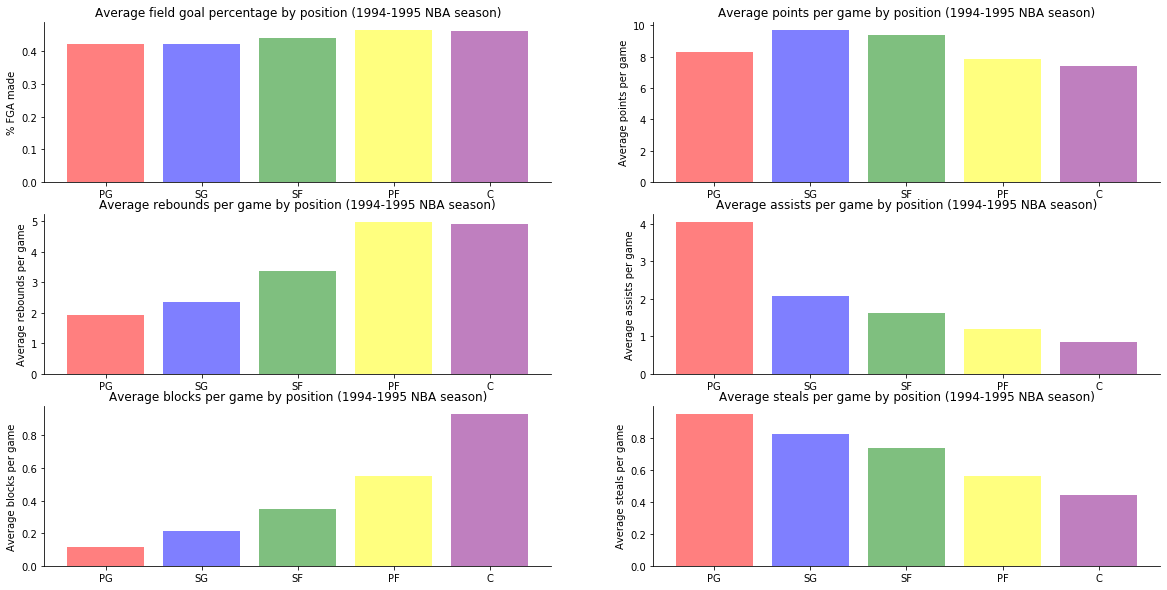

In [58]:
fig, ax = plt.subplots(3,2, figsize=[20,10])

ax[0,0].bar(players_1994_pos.index, players_1994_pos['FG%'], color=colors, alpha=0.5)
ax[0,0].set_title('Average field goal percentage by position (1994-1995 NBA season)')
ax[0,0].set_ylabel('% FGA made')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)

ax[0,1].bar(players_1994_pos.index, players_1994_pos['PTS'], color=colors, alpha=0.5)
ax[0,1].set_title('Average points per game by position (1994-1995 NBA season)')
ax[0,1].set_ylabel('Average points per game')
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)

ax[1,0].bar(players_1994_pos.index, players_1994_pos['TRB'], color=colors, alpha=0.5)
ax[1,0].set_title('Average rebounds per game by position (1994-1995 NBA season)')
ax[1,0].set_ylabel('Average rebounds per game')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

ax[1,1].bar(players_1994_pos.index, players_1994_pos['AST'], color=colors, alpha=0.5)
ax[1,1].set_title('Average assists per game by position (1994-1995 NBA season)')
ax[1,1].set_ylabel('Average assists per game')
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)

ax[2,0].bar(players_1994_pos.index, players_1994_pos['BLK'], color=colors, alpha=0.5)
ax[2,0].set_title('Average blocks per game by position (1994-1995 NBA season)')
ax[2,0].set_ylabel('Average blocks per game')
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)

ax[2,1].bar(players_1994_pos.index, players_1994_pos['STL'], color=colors, alpha=0.5)
ax[2,1].set_title('Average steals per game by position (1994-1995 NBA season)')
ax[2,1].set_ylabel('Average steals per game')
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)

In [68]:
players_1994[(players_1994['Pos']=='SG') & (players_1994['PTS'] > 15)].sort_values('PTS', ascending=False).head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
208,Michael Jordan*,SG,31,CHI,17,17,39.3,9.8,23.8,0.411,0.9,1.9,0.500,8.8,21.9,0.403,0.431,6.4,8.0,0.801,1.5,5.4,6.9,5.3,1.8,0.8,2.1,2.8,26.9
197,Jim Jackson,SG,24,DAL,51,51,38.9,9.5,20.1,0.472,0.7,2.2,0.318,8.8,18.0,0.490,0.489,6.0,7.5,0.805,2.4,2.7,5.1,3.7,0.5,0.2,3.1,1.8,25.7
334,Mitch Richmond*,SG,29,SAC,82,82,38.7,8.1,18.3,0.446,1.9,5.2,0.368,6.2,13.1,0.477,0.498,4.6,5.4,0.843,0.8,3.5,4.4,3.8,1.1,0.4,2.9,2.8,22.8
103,Clyde Drexler*,SG,32,TOT,76,75,35.9,7.5,16.3,0.461,1.9,5.4,0.360,5.6,10.9,0.511,0.521,4.8,5.8,0.824,2.0,4.3,6.3,4.8,1.8,0.6,2.4,2.7,21.8
383,Latrell Sprewell,SG,24,GSW,69,69,40.2,7.1,17.0,0.418,1.3,4.7,0.276,5.8,12.2,0.473,0.457,5.1,6.5,0.781,0.8,2.9,3.7,4.0,1.6,0.7,3.3,1.6,20.6


It would seem that my previous hypothesis about scoring was only about half right. Point guards did have a smaller share of scoring as compared to the 2014 data, but shooting guards actually accounted for the largest share of points per game. Unsurprisingly, this probably has something to do with Michael Jordan, who averaged 26.9 pts/game, along with a few other big scorers, namely Jim Jackson, Mitch Richmond, and Clyde Drexler. The next highest scoring position is small forward, which further asserts my belief that this era was more focused on inside scoring than the modern era of basketball. Let's check on that belief.

In [77]:
share_3p_2014 = (sum(players['3PA']) / sum(players['FGA']))*100

share_3p_1994 = (sum(players_1994['3PA']) / sum(players['FGA']))*100

print('In the 2014-2015 NBA season, {0:.2f}% of all shots were 3-point shots'.format(share_3p_2014))
print('In the 1994-1995 NBA season, {0:.2f}% of all shots were 3-point shots'.format(share_3p_1994))

In the 2014-2015 NBA season, 27.30% of all shots were 3-point shots
In the 1994-1995 NBA season, 15.47% of all shots were 3-point shots


It's not perfect methodology, but it does give us a quick look into how shooting patterns have changed over 20 years of basketball. I think we can go deeper, though.

In [120]:
keep = ['Team', '0-3', '3-10', '10-16', '16-3pt', '3P']

shooting_2014 = pd.read_csv('data_files//shooting_2014.csv', skiprows=2, usecols=keep)
shooting_2014 = shooting_2014.transpose()
shooting_2014.columns = shooting_2014.iloc[0]
shooting_2014 = shooting_2014.drop('Team', axis=0)

# Shooting splits only started being tracked in the '96 season, so we have to use that.
shooting_1996 = pd.read_csv('data_files//shooting_1996.csv', skiprows=2, usecols=keep)
shooting_1996 = shooting_1996.transpose()
shooting_1996.columns = shooting_1996.iloc[0]
shooting_1996 = shooting_1996.drop('Team', axis=0)

shooting_2018 = pd.read_csv('data_files//shooting_2018.csv', skiprows=2, usecols=keep)
shooting_2018 = shooting_2018.transpose()
shooting_2018.columns = shooting_2018.iloc[0]
shooting_2018 = shooting_2018.drop('Team', axis=0)
shooting_2018

Team,Atlanta Hawks,Boston Celtics*,Brooklyn Nets*,Chicago Bulls,Charlotte Hornets,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets*,Detroit Pistons*,Golden State Warriors*,Houston Rockets*,Indiana Pacers*,Los Angeles Clippers*,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks*,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder*,Orlando Magic*,Philadelphia 76ers*,Phoenix Suns,Portland Trail Blazers*,Sacramento Kings,San Antonio Spurs*,Toronto Raptors*,Utah Jazz*,Washington Wizards,League Average
0-3,0.332,0.248,0.299,0.31,0.289,0.277,0.268,0.277,0.263,0.25,0.261,0.311,0.312,0.345,0.278,0.291,0.34,0.288,0.315,0.311,0.339,0.246,0.285,0.301,0.329,0.277,0.214,0.279,0.315,0.306,0.292
3-10,0.134,0.147,0.166,0.191,0.165,0.171,0.157,0.203,0.197,0.107,0.145,0.158,0.182,0.155,0.184,0.175,0.122,0.176,0.199,0.129,0.132,0.161,0.166,0.158,0.133,0.199,0.179,0.169,0.153,0.137,0.162
10-16,0.083,0.114,0.084,0.104,0.083,0.114,0.088,0.101,0.074,0.121,0.05,0.086,0.113,0.078,0.101,0.102,0.066,0.099,0.094,0.103,0.102,0.104,0.105,0.114,0.09,0.097,0.156,0.09,0.073,0.086,0.096
16-3pt,0.047,0.109,0.048,0.101,0.084,0.105,0.065,0.07,0.073,0.138,0.025,0.152,0.098,0.08,0.095,0.064,0.053,0.121,0.068,0.122,0.08,0.128,0.101,0.093,0.109,0.104,0.165,0.083,0.064,0.101,0.092
3P,0.403,0.381,0.403,0.295,0.378,0.332,0.422,0.348,0.394,0.384,0.519,0.292,0.295,0.342,0.342,0.368,0.419,0.315,0.324,0.334,0.347,0.36,0.342,0.335,0.339,0.321,0.286,0.379,0.394,0.37,0.359


These data sets are fetched from basketball-reference.com and contain information on each team's shooting splits from multiple distance ranges. The subset of this data that I am most interested in is the field goal attempt percentages, which will tell us what percent of shots were taken from each range.

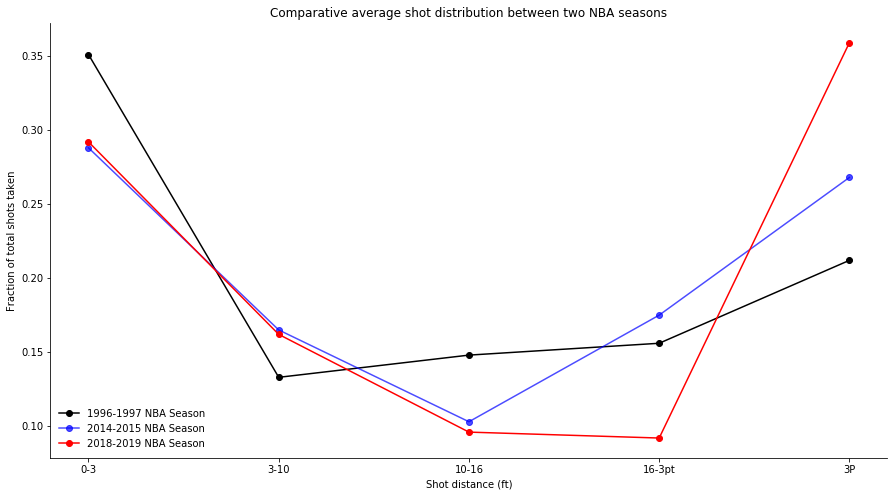

In [132]:
fig, ax = plt.subplots(figsize=[15,8])

ax.plot(shooting_1996.index, shooting_1996['League Average'], marker='o', c='black', alpha=1.0, label='1996-1997 NBA Season')
ax.plot(shooting_2014.index, shooting_2014['League Average'], marker='o', c='blue', alpha=0.7, label='2014-2015 NBA Season')
ax.plot(shooting_2018.index, shooting_2018['League Average'], marker='o', c='red', alpha=1.0, label='2018-2019 NBA Season')

ax.set_title('Comparative average shot distribution between three NBA seasons')
ax.set_xlabel('Shot distance (ft)')
ax.set_ylabel('Fraction of total shots taken')

ax.legend(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

A lot to unpack here. You'll notice the 1996-1997 season was a lot more friendly towards the midrange shot, with 3-10 ft, 10-16ft, and 16ft-3pt all hovering around 15% of the league's total shots. The 2014 season shows a very distinct "trough" shape, with many shots taken close up, very few taken in the middle of mid-range, and an increasing share of deep two-pointers and threes. This trend goes even further in the 2018-2019 season, with very few shots being taken in the mid-range and a vast majority of shots taken from beyond the arc. 

This makes a lot of sense. Teams in the 90s didn't take nearly as many threes as teams do now and focused more on inside scoring and mid-range shots. Slashing shooting guards and small forwards thrived and earned most of their points close to the basket. Today, the game is built around layups and three-point shots as teams have shifted their emphasis towards shot efficiency, and sharpshooters like Steph Curry and James Harden have begun to thrive.

Text(53.5, 0.516, 'Houston Rockets')

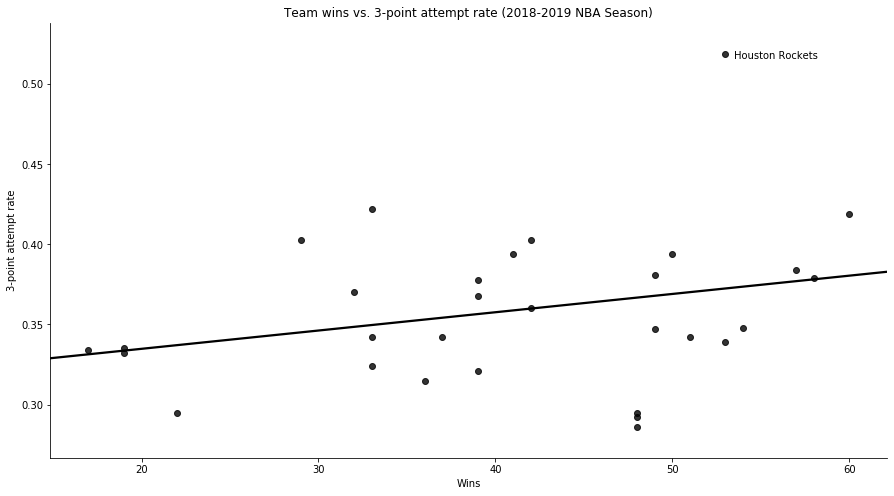

In [153]:
summary = pd.read_csv('data_files//2018.csv', skiprows=1, index_col='Team')

fig, ax = plt.subplots(figsize=[15,8])

g = sns.regplot(data=summary,
                x='W',
                y='3PAr',
                ax=ax,
                color='black',
                ci=0)

sns.despine(ax=ax)
ax.set_title('Team wins vs. 3-point attempt rate (2018-2019 NBA Season)')
ax.set_xlabel('Wins')
ax.set_ylabel('3-point attempt rate')
ax.text(53.5,.516, 'Houston Rockets')

One final thing I wanted to check on. This compares a team's win total in the 2018-2019 NBA season to the share of total shots it took from beyond the arc. There is an upward trend, however it isn't terrifically strong. Perhaps the most interesting data point on the graph is the Houston Rockets, seen above stretching the y-axis by about 15%. The Rockets are managed by Daryl Morey, who is well-known for championing the "Moreyball" strategy we've been discussing. Morey's strategy has been to eliminate the mid-range shot and maximize the efficiency of each shot his team takes. In the 2018-2019 season, only 7.5% of the Rockets' shots came from between 10 ft and the three point line. Teams like the Milwaukee Bucks have imitated this strategy to great success, with only 11.9% of their shots coming from the 10ft-3pt range and 41.9% of their shots coming from beyond the arc. 

In [51]:
players_ml = players[players['MP'] > 20]
to_keep2 = ['Pos', 'PTS', 'TRB', 'AST', 'STL', 'BLK',]
players_ml = players_ml[to_keep2]
players_ml_test = players_ml.sample(10, random_state=3)

y_players_ml_test = players_ml_test['Pos']
x_players_ml_test = players_ml_test.drop('Pos', axis=1)

x_players_ml_test

,PTS,TRB,AST,STL,BLK
43,10.6,4.9,1.3,0.5,0.4
338,10.1,2.8,3.6,0.7,0.1
314,11.7,6.7,1.1,0.5,1.8
21,12.7,6.7,2.6,0.9,1.0
158,8.7,4.3,2.9,0.4,0.3
336,6.2,2.3,3.0,1.2,0.1
310,9.9,4.2,1.6,0.8,0.6
444,14.4,1.9,4.9,0.6,0.0
105,10.2,2.6,3.8,1.5,0.1
355,16.4,9.7,2.2,0.7,0.5


In [52]:
y_test = y_players_ml_test.to_numpy()
x_test = x_players_ml_test.to_numpy()

data_train = players_ml.drop(players_ml_test.index)

y_train = data_train['Pos'].to_numpy()
x_train = data_train.drop('Pos', axis=1).to_numpy()

In [53]:
model = LogisticRegression(random_state=0).fit(x_train, y_train)

C:\Users\Owner\Anaconda3_2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3_2\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [54]:
model.predict(x_test)

array(['PF', 'PG', 'C', 'C', 'PF', 'PG', 'SF', 'PG', 'PG', 'PF'],
      dtype=object)

In [55]:
y_test

array(['PF', 'PG', 'PF', 'SG', 'PF', 'PG', 'SF', 'PG', 'PG', 'PF'],
      dtype=object)

Not bad. 8/10 correct.

In [34]:
model.score(x_test, y_test)

0.8